In [ ]:
import numpy as np
import pandas as pd

test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

display(train)
print(test[test["horsepower"] == "?"].index)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,23.059782,6,140,110,2815,17.977429,80,1,dodge aspen
1,3,17.674521,8,350,150,4456,13.514535,72,1,dodge rampage
2,4,17.136353,8,302,140,2774,13.209912,79,1,mercury cougar brougham
3,7,22.664666,6,400,85,2190,15.196381,71,1,pontiac j2000 se hatchback
4,9,17.872018,8,429,220,2245,9.621400,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...,...
495,981,22.798447,4,140,148,2835,13.477573,82,1,datsun 200-sx
496,983,35.173640,4,97,67,2234,17.542681,80,3,plymouth valiant
497,994,17.825448,8,302,220,2774,15.177189,76,1,triumph tr7 coupe
498,995,28.545147,4,97,150,2130,13.324669,70,1,datsun pl510


Int64Index([98, 181, 381, 387, 407, 435], dtype='int64')


In [ ]:
train.groupby("origin").agg({"acceleration":"mean","weight":"mean", "displacement":"mean"}).reset_index().head()


,origin,acceleration,weight,displacement
0,1,15.134729,2744.469169,215.013405
1,2,16.672556,3019.386364,145.954545
2,3,15.317078,2449.602410,129.626506


In [ ]:
from collections import Counter
from pprint import pprint

counts = Counter(train[ "model year"])
pprint(counts)

# columns = train.query('columns != "model year"')
# df_lista = (train, test)
# for df in df_lista:


train.groupby("model year").agg({'displacement':'mean', 'weight':'mean', 'acceleration':'mean'}).reset_index()
dis_year_mean = train.groupby("model year").agg({'displacement':'mean'}).reset_index()
weight_year_mean = train.groupby("model year").agg({'weight':'mean'}).reset_index()
acce_year_mean = train.groupby("model year").agg({'acceleration':'mean'}).reset_index()

train_tmp = pd.merge(train, dis_year_mean, how="left", on="model year")
train_tmp2 = pd.merge(train_tmp, weight_year_mean, how="left", on="model year")
train_tmp3 = pd.merge(train_tmp2, acce_year_mean, how="left", on="model year")
train_tmp3['displacement_y'] = abs(train_tmp3['displacement_x'] - train_tmp3['displacement_y'])
train_tmp3['weight_y'] = abs(train_tmp3['weight_x'] - train_tmp3['weight_y'])
train_tmp3['acceleration_y'] = abs(train_tmp3['acceleration_x'] - train_tmp3['acceleration_y'])
train_tmp3.head()

test.groupby("model year").agg({'displacement':'mean', 'weight':'mean', 'acceleration':'mean'}).reset_index()
dis_year_mean = test.groupby("model year").agg({'displacement':'mean'}).reset_index()
weight_year_mean = test.groupby("model year").agg({'weight':'mean'}).reset_index()
acce_year_mean = test.groupby("model year").agg({'acceleration':'mean'}).reset_index()

test_tmp = pd.merge(test, dis_year_mean, how="left", on="model year")
test_tmp2 = pd.merge(test_tmp, weight_year_mean, how="left", on="model year")
test_tmp3 = pd.merge(test_tmp2, acce_year_mean, how="left", on="model year")
test_tmp3['displacement_y'] = abs(test_tmp3['displacement_x'] - test_tmp3['displacement_y'])
test_tmp3['weight_y'] = abs(test_tmp3['weight_x'] - test_tmp3['weight_y'])
test_tmp3['acceleration_y'] = abs(test_tmp3['acceleration_x'] - test_tmp3['acceleration_y'])
test_tmp3.head()

Counter({81: 63,
         71: 62,
         80: 52,
         76: 48,
         79: 43,
         70: 35,
         78: 34,
         82: 33,
         73: 32,
         75: 29,
         74: 27,
         77: 23,
         72: 19})


,id,cylinders,displacement_x,horsepower,weight_x,acceleration_x,model year,origin,car name,displacement_y,weight_y,acceleration_y
0,1,4,98,67,2000,15.049795,81,1,60,19.150000,296.800000,0.041446
1,2,4,97,90,2720,15.339172,79,1,33,106.086957,162.826087,0.922165
2,5,4,90,75,2807,17.821599,77,1,36,6.388889,28.722222,1.086631
3,6,4,140,110,2807,13.780354,82,2,8,29.695652,147.652174,1.140783
4,8,4,121,85,3070,13.688921,73,2,70,95.195122,218.414634,2.023062


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_list = [train_tmp3, test_tmp3]
cat_cols = ["car name"]
for df in df_list:

  for cat_col in cat_cols:
    le = LabelEncoder()
    le.fit(df[cat_col])
    df[cat_col] = le.transform(df[cat_col])

GBDTの際に使われるラベルエンコーディングの処理、for文を使うことでtrainとtest、そしてすべてのカテゴリーカラムに対して処理を行えた。

In [ ]:
train_mean = train_tmp3.query('horsepower != "?"').astype({"horsepower":int}).mean()
test_mean = test_tmp3.query('horsepower != "?"').astype({"horsepower":int}).mean()
train_ = train_tmp3.replace({"horsepower":{"?":train_mean["horsepower"]}}).astype({"horsepower":int})
test_ = test_tmp3.replace({"horsepower":{"?":test_mean["horsepower"]}}).astype({"horsepower":int})



testの方にも欠損があることってあるんだと知った。常にtrainとtestは同時に処理する必要がありそう

In [ ]:
# 特徴量の作成



df_list2 = [train_, test_]
for df in df_list2:
  df['dis_horse'] = df['displacement_x']/df['horsepower']
  df['dis_weight'] = df['displacement_x']/df['weight_x']
  df["dis_acce"] = df["displacement_x"]*df['acceleration_x']
  # df["dis_year"] = df['displacement']*df['model year']
  df["horse_weight"] = df['horsepower']*df['weight_x']
  df["horse_acce"] = df['horsepower']*df['acceleration_x']
  # df["horse_year"] = df['horsepower']*df['model year']
  df["weight_acce"] = df['weight_x']*df['acceleration_x']
  # df["weight_year"] = df['weight']*df['model year']
  df["acce_year"] = df['acceleration_x']*df['model year']
  df["weight_cylin"] = df["weight_x"]/df["cylinders"]
  


In [ ]:
training = train_.drop(["id"], axis=1).reset_index(drop=True)
train_x = training.drop(["mpg"], axis=1).reset_index(drop=True)
train_y = training["mpg"]

test_x = test_.drop(["id"],axis=1).reset_index(drop=True)
test_id = test_["id"]

In [ ]:
# 特徴量の選択
from sklearn.feature_selection import mutual_info_regression
# 相互情報量
# corrs = []
mi = mutual_info_regression(train_x, train_y)
# corrs.append(mi)
# corrs = np.array(corrs)
# 重要度の上位5個を抽出
idx = np.argsort(mi)[::-1]
top_cols, top_importances = train_x.columns.values[idx][:-1],mi[idx][:-1]
print(top_cols, top_importances)


['car name' 'displacement_x' 'acceleration_x' 'dis_acce' 'weight_x'
 'acce_year' 'horsepower' 'weight_cylin' 'horse_weight' 'dis_weight'
 'weight_acce' 'horse_acce' 'weight_y' 'displacement_y' 'dis_horse'
 'model year' 'acceleration_y' 'cylinders'] [1.02737825 0.93817919 0.82906938 0.82346306 0.82154609 0.77603055
 0.7594876  0.72300829 0.69240639 0.69196697 0.68380404 0.68218642
 0.67765878 0.67324256 0.6649461  0.64984846 0.58469345 0.53518681]


Kaggleで勝つ、p.329-332

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['car name', 'origin']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 10 rounds.
[20]	Train's l2: 6.53165	Valid's l2: 12.0041
[40]	Train's l2: 3.32563	Valid's l2: 9.71772
[60]	Train's l2: 2.19616	Valid's l2: 9.09096
[80]	Train's l2: 1.55497	Valid's l2: 8.86916
[100]	Train's l2: 1.17661	Valid's l2: 8.78595
Early stopping, best iteration is:
[94]	Train's l2: 1.2628	Valid's l2: 8.76094


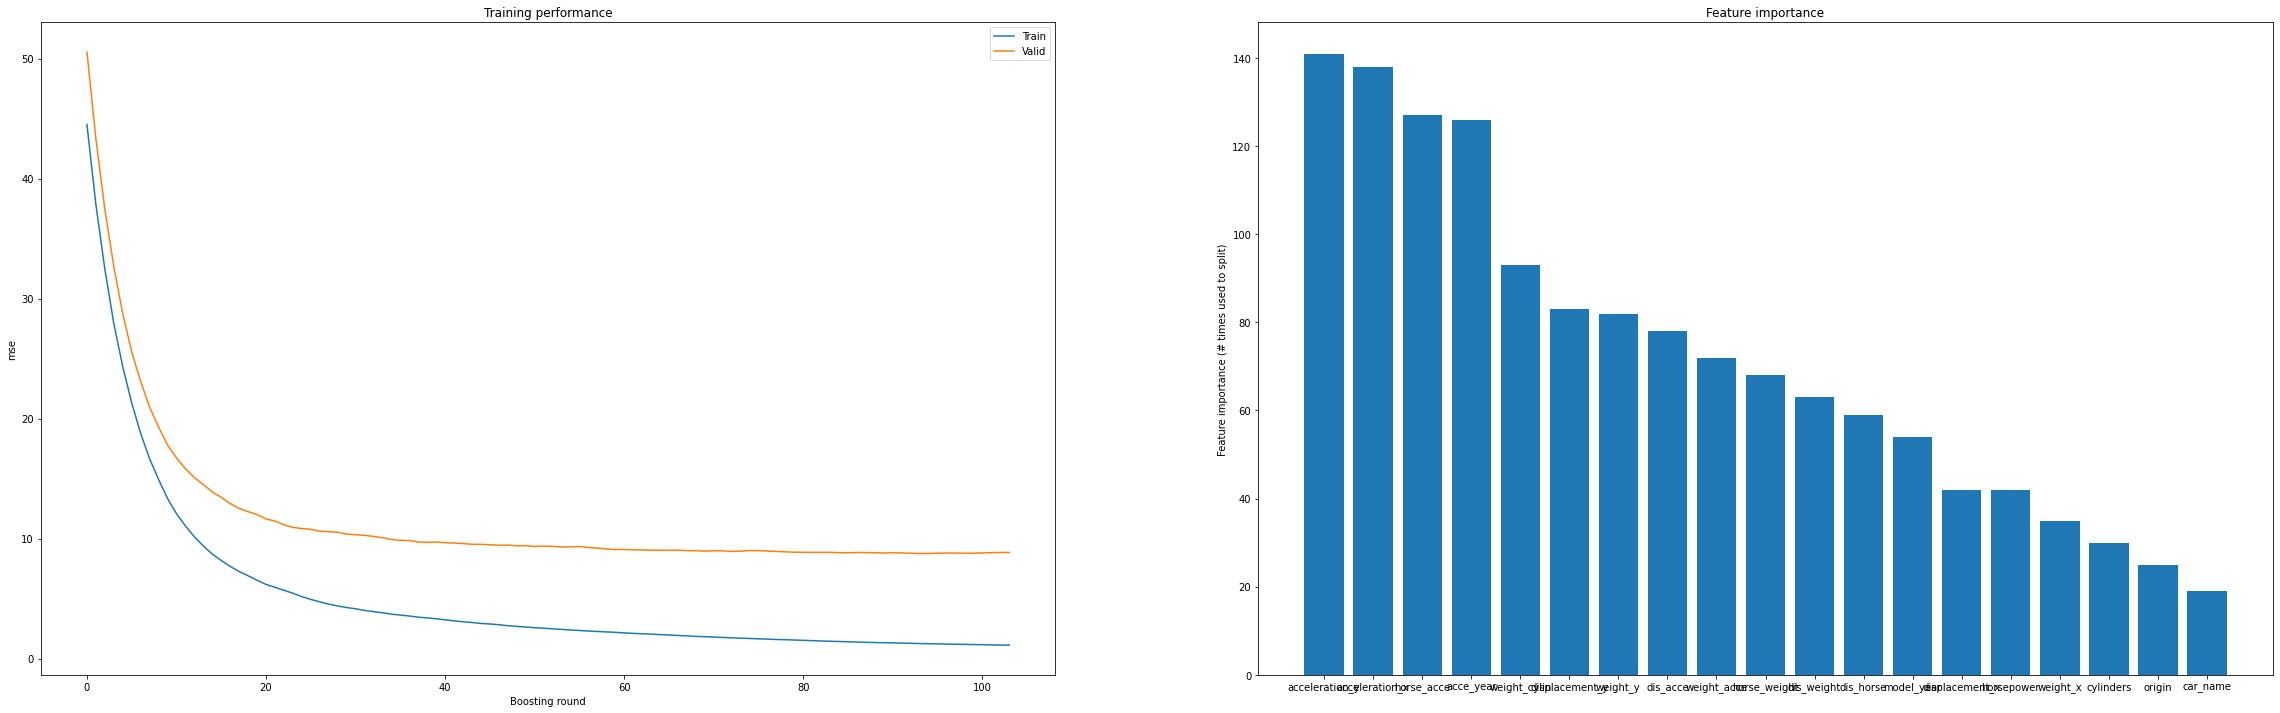

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['car name', 'origin']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 10 rounds.
[20]	Train's l2: 6.63737	Valid's l2: 11.2636
[40]	Train's l2: 3.37269	Valid's l2: 10.2186
Early stopping, best iteration is:
[32]	Train's l2: 4.14369	Valid's l2: 10.1061


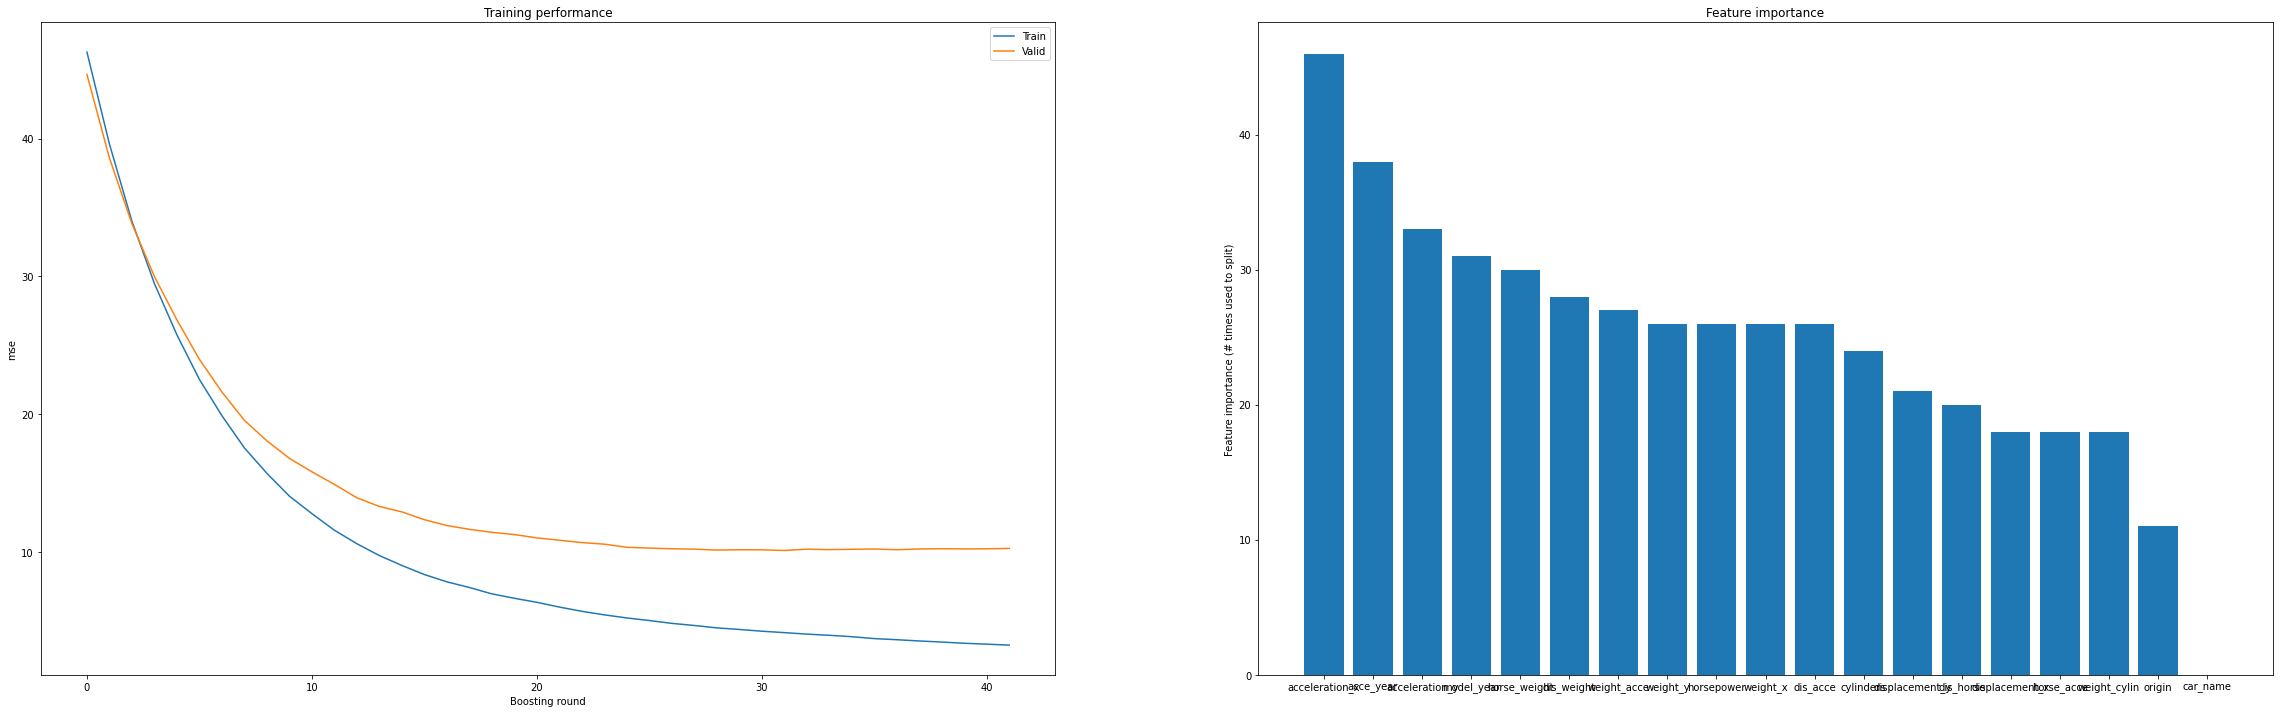

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['car name', 'origin']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 10 rounds.
[20]	Train's l2: 6.84574	Valid's l2: 9.37227
[40]	Train's l2: 3.65683	Valid's l2: 7.8848
[60]	Train's l2: 2.46347	Valid's l2: 7.71892
Early stopping, best iteration is:
[54]	Train's l2: 2.76876	Valid's l2: 7.66678


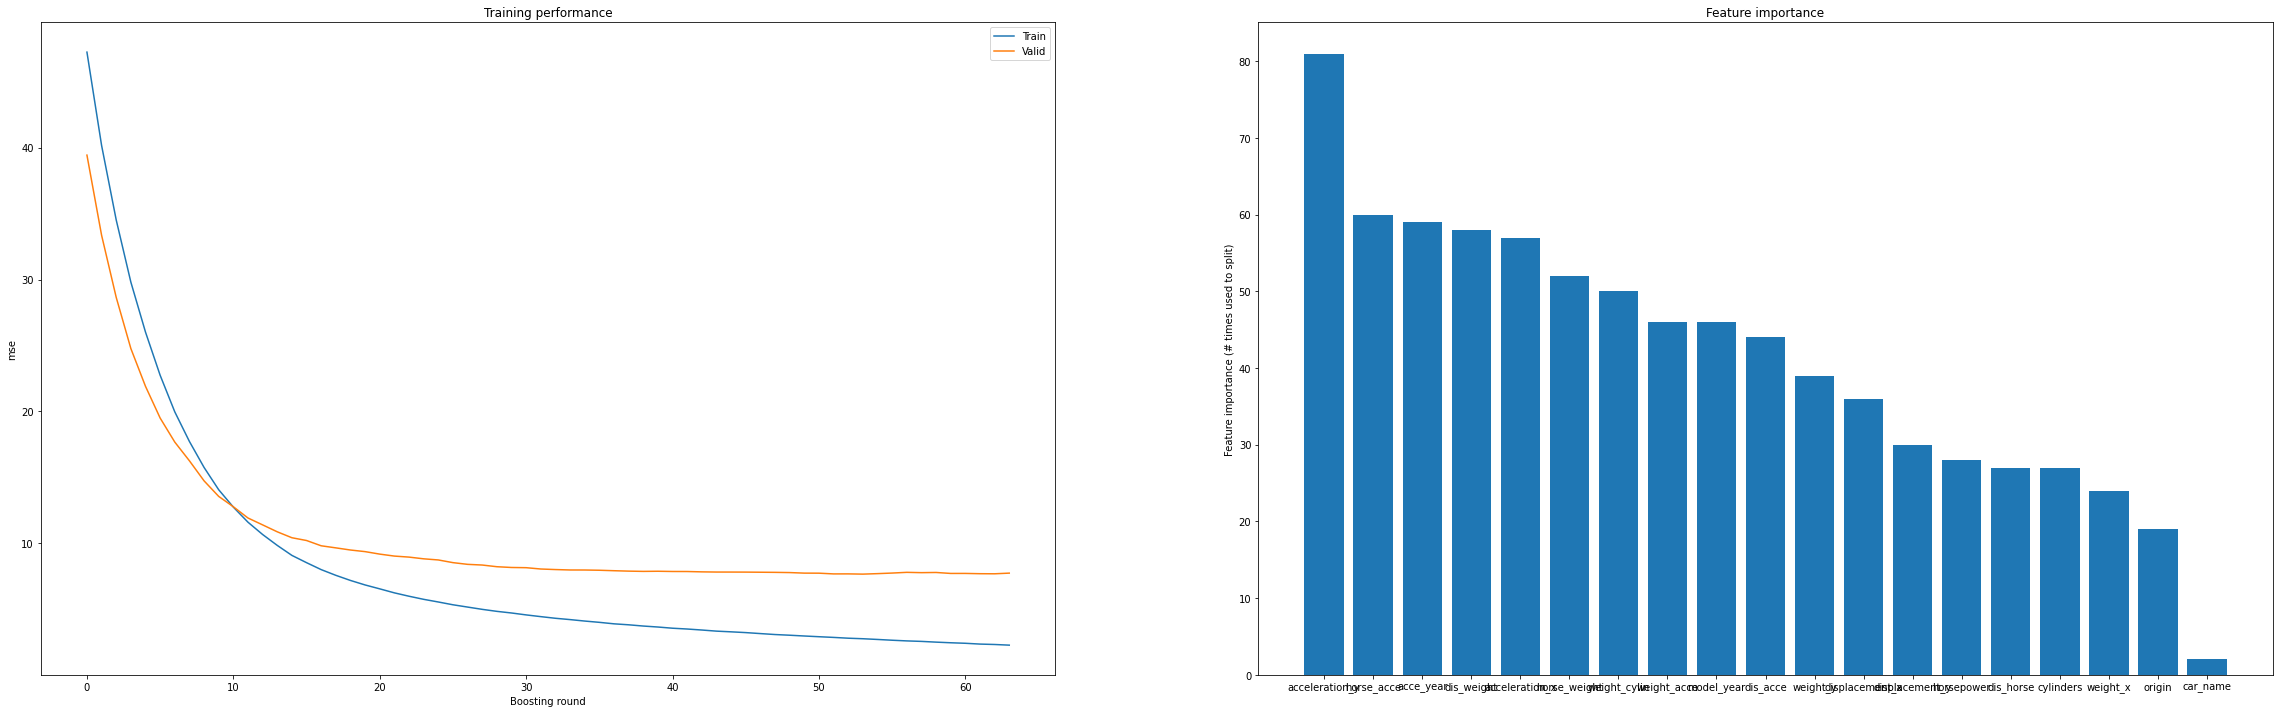

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['car name', 'origin']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 10 rounds.
[20]	Train's l2: 6.55665	Valid's l2: 13.6947
[40]	Train's l2: 3.25626	Valid's l2: 11.9313
[60]	Train's l2: 2.22155	Valid's l2: 11.6515
Early stopping, best iteration is:
[65]	Train's l2: 1.99095	Valid's l2: 11.5861


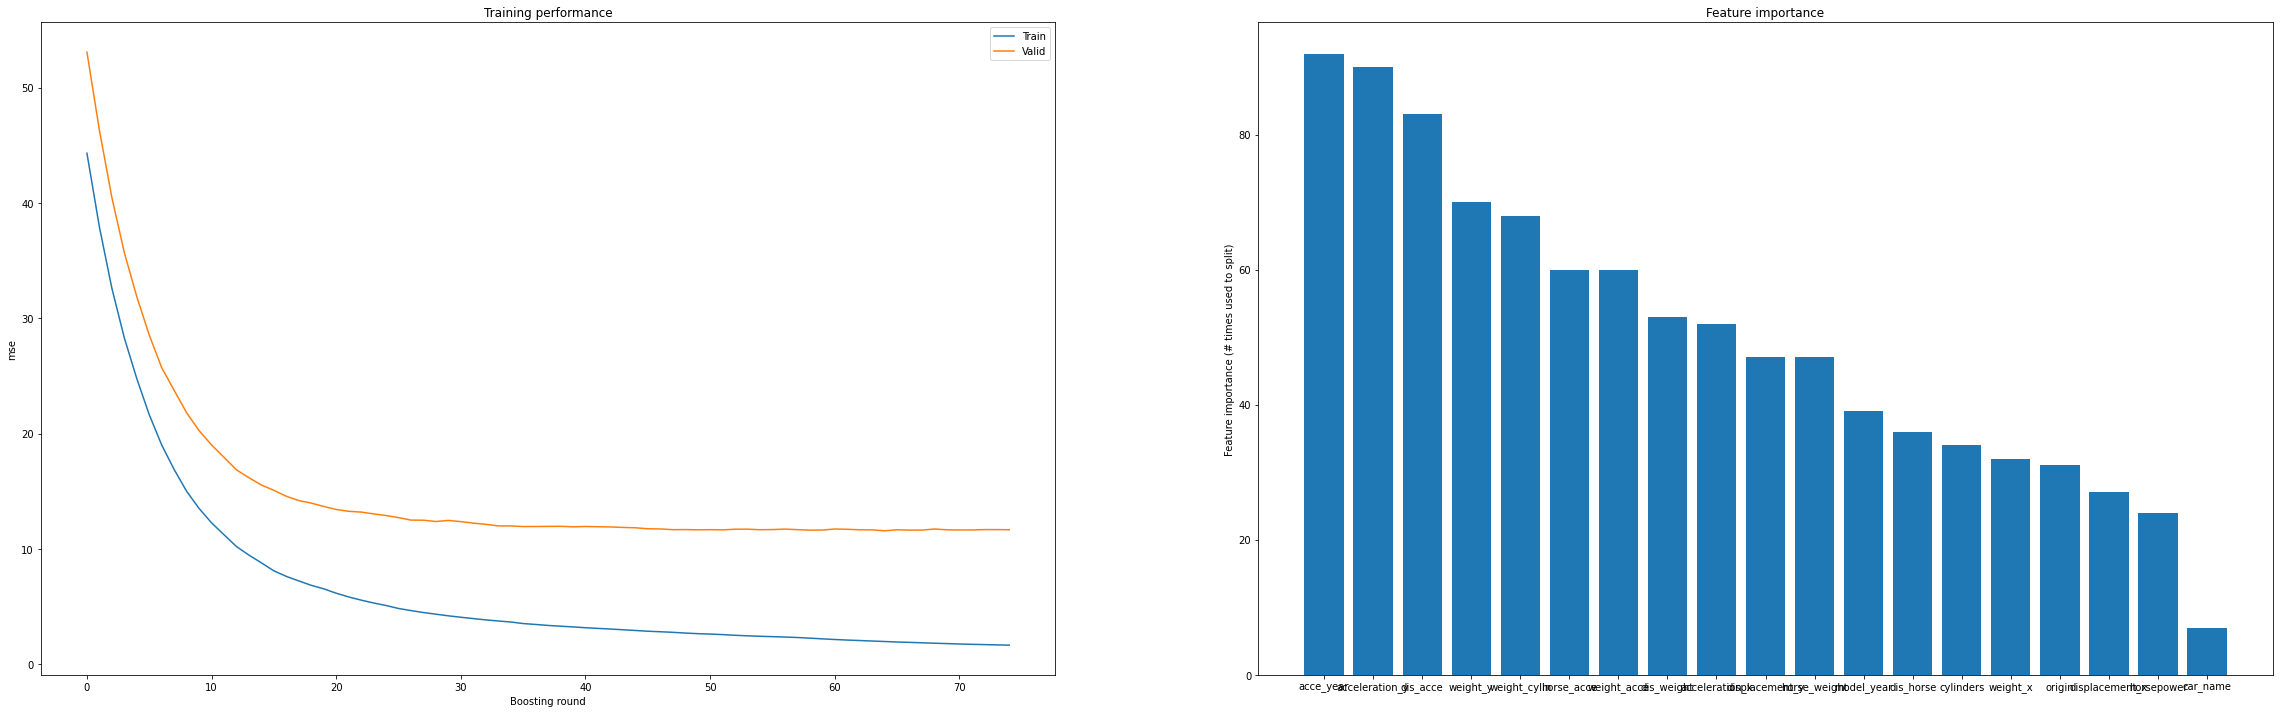

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['car name', 'origin']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 10 rounds.
[20]	Train's l2: 6.84962	Valid's l2: 8.188
[40]	Train's l2: 3.55975	Valid's l2: 6.77704
Early stopping, best iteration is:
[48]	Train's l2: 3.03977	Valid's l2: 6.55403


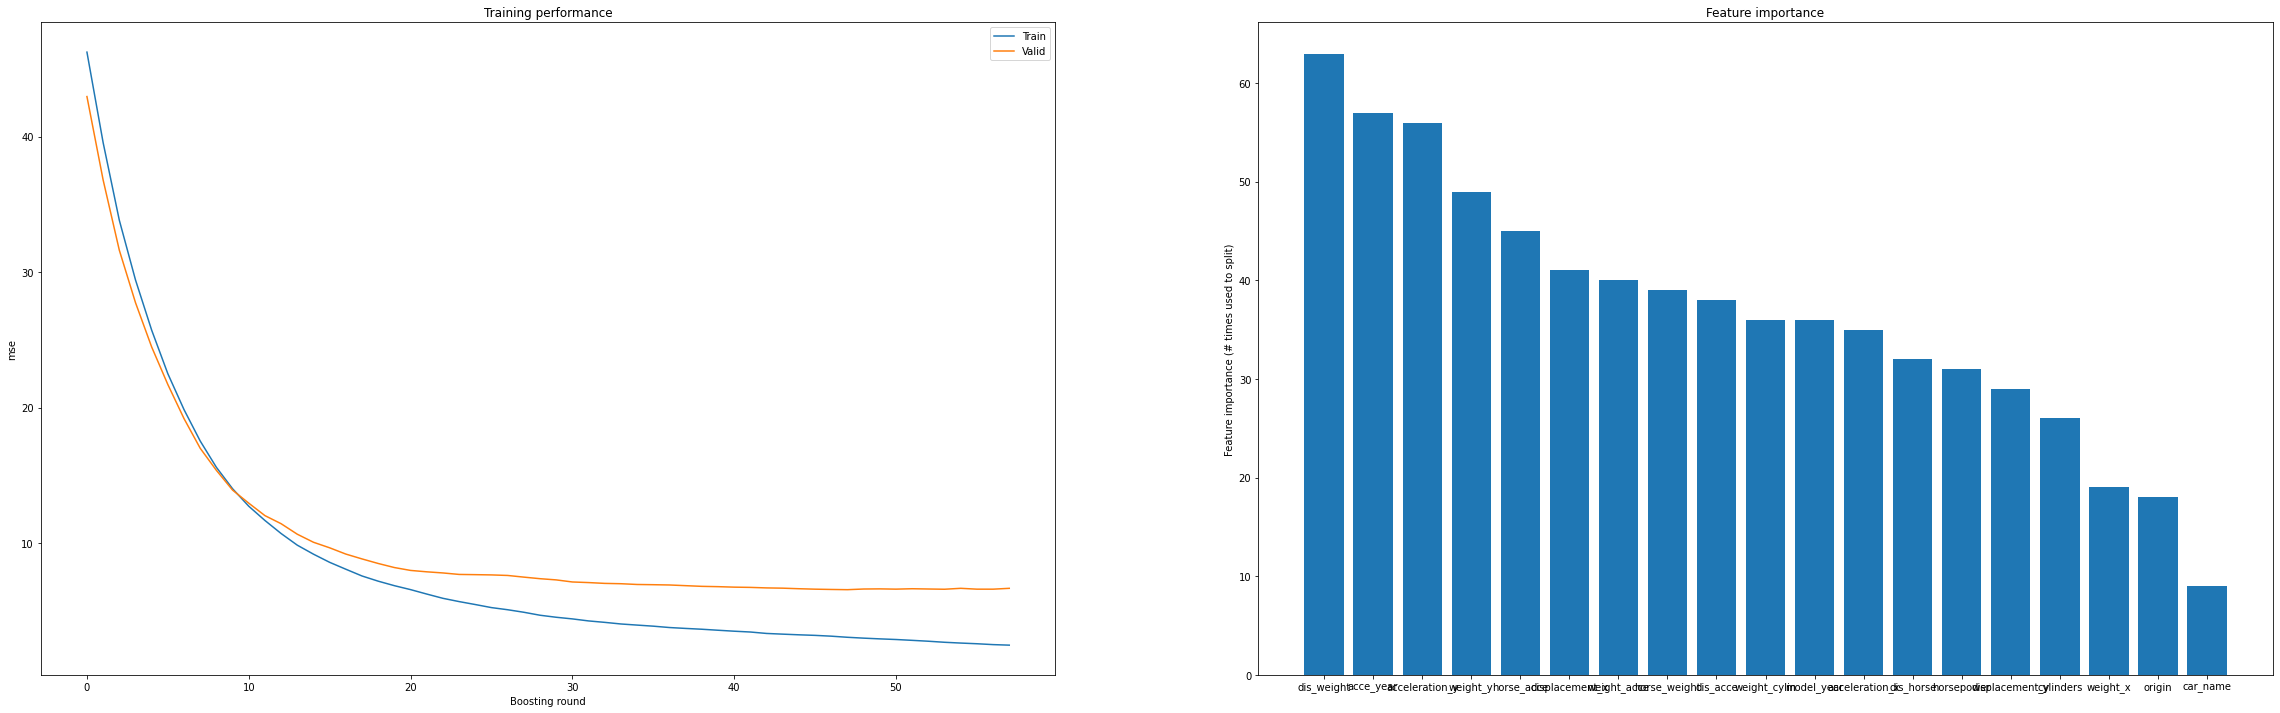

logloss:8.934794


In [ ]:
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error # モデル評価用(平均二乗誤差)
import matplotlib.pyplot as plt

lgb_params = {"objective":"regression", 
              "metric":"mse"}
cat_features = {"origin", "car name"}
evaluation_results = {}
scores = []


kf = KFold(n_splits = 5)
for tr_index, va_index in kf.split(train_x):
  tr_x, va_x = train_x.iloc[tr_index], train_x.iloc[va_index]
  tr_y, va_y = train_y.iloc[tr_index], train_y.iloc[va_index]
  
  lgb_train = lgb.Dataset(tr_x, tr_y)
  lgb_eval = lgb.Dataset(va_x, va_y)
  
  model = lgb.train(lgb_params, num_boost_round=500,
                    categorical_feature=cat_features,
                    verbose_eval=20, 
                    evals_result=evaluation_results,
                    early_stopping_rounds=10,
                    train_set=lgb_train,
                    valid_sets=[lgb_train, lgb_eval], valid_names=["Train", "Valid"])
  
 
  fig, axs = plt.subplots(1, 2, figsize=[40, 12])

# Plot the log loss during training
  axs[0].plot(evaluation_results["Train"]['l2'], label='Train')
  axs[0].plot(evaluation_results["Valid"]['l2'], label='Valid')
  axs[0].set_ylabel('mse')
  axs[0].set_xlabel('Boosting round')
  axs[0].set_title('Training performance')
  axs[0].legend()

# Plot feature importance
  importances = pd.DataFrame({'features': model.feature_name(), 
                            'importance': model.feature_importance()}).sort_values('importance', ascending=False)
  axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
  axs[1].set_xticks(np.arange(len(importances)))
  axs[1].set_xticklabels(importances['features'])
  axs[1].set_ylabel('Feature importance (# times used to split)')
  axs[1].set_title('Feature importance')

  plt.show()

  va_pred = model.predict(va_x)
  score = mean_squared_error(va_y, va_pred)
  scores.append(score)

print(f'logloss:{np.mean(scores):4f}')
fcst = model.predict(test_x)

  # print(fcst_cv)
  # fcst = fcst.mean()
  # print(fcst)

ラストのpredictの部分、謎、fcstの値がｃｖした分だけできているはずなのになぜfcstとしておさまるのだろうか、もしや勝手に平均取ってくれてる？

In [ ]:
from sklearn.metrics import r2_score # モデル評価用(決定係数)


In [ ]:
display(evaluation_results)

{'Train': defaultdict(list,
             {'l2': [46.23854223447039,
               39.561372580195524,
               33.833411492846054,
               29.42358129517229,
               25.714359830104364,
               22.49642821351605,
               19.84602054040079,
               17.53031650470278,
               15.586993439436842,
               14.007547459324085,
               12.716134675693551,
               11.662701363232397,
               10.699965706843377,
               9.839758627904448,
               9.175464611725413,
               8.573030837912006,
               8.064086436642777,
               7.5651973204413885,
               7.1823838891526135,
               6.84961958394822,
               6.55862638773993,
               6.2312748889657925,
               5.916162724171048,
               5.67505740627169,
               5.457297324820286,
               5.230988013360084,
               5.07377747561429,
               4.887154231893463,
       

In [ ]:
id = np.array(test_id)
solution = pd.DataFrame(fcst, id)
solution.to_csv("answer(3).csv", header=False)
display(solution)

,0
1,35.570738
2,28.394331
5,27.749921
6,31.425156
8,26.371114
...,...
992,28.994327
993,30.628251
996,17.751770
998,27.749921


参考にしたサイト
https://mathmatical22.xyz/2020/04/09/%E3%80%90%E5%88%9D%E5%AD%A6%E8%80%85%E5%90%91%E3%81%91%E3%80%91lightgbm-%E5%9F%BA%E6%9C%AC%E7%9A%84%E3%81%AA%E4%BD%BF%E3%81%84%E6%96%B9-%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E7%B7%A8%E3%80%90python/

https://happy-analysis.com/python/python-topic-lghtgbm-basic.html#iris

In [ ]:
# %pip install optuna 
# from sklearn.model_selection import KFold
# import optuna.integration.lightgbm as lgb
# trainval = lgb.Dataset(train_x, train_y)
# params = {'objective': 'regression',
          # 'metric': 'rmse',
          # 'random_seed':0} 

# tuner = lgb.LightGBMTunerCV(params, trainval, verbose_eval=100, early_stopping_rounds=100, folds=KFold(n_splits=3))
# tuner.run()
 
# best_params = tuner.best_params
# print("  Params: ")
# for key, value in best_params.items():
    # print("    {}: {}".format(key, value))